In [269]:
#Library importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [270]:
# beer data set (BDS) importing
BDS = pd.read_csv("C:/Users/user/Downloads/monthly-beer-production-in-austr.csv")

In [271]:
#show how the date is presented in the file
BDS.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [272]:
# task 1.1 Calculate the Summary statistics (mean, median, standard deviation)
print("Summary Statistics:")
print("Mean:", BDS["Monthly beer production"].mean())
print("Median:", BDS["Monthly beer production"].median())
print("Standard Deviation:", BDS["Monthly beer production"].std())

Summary Statistics:
Mean: 136.3953781512605
Median: 139.15
Standard Deviation: 33.73872458301115


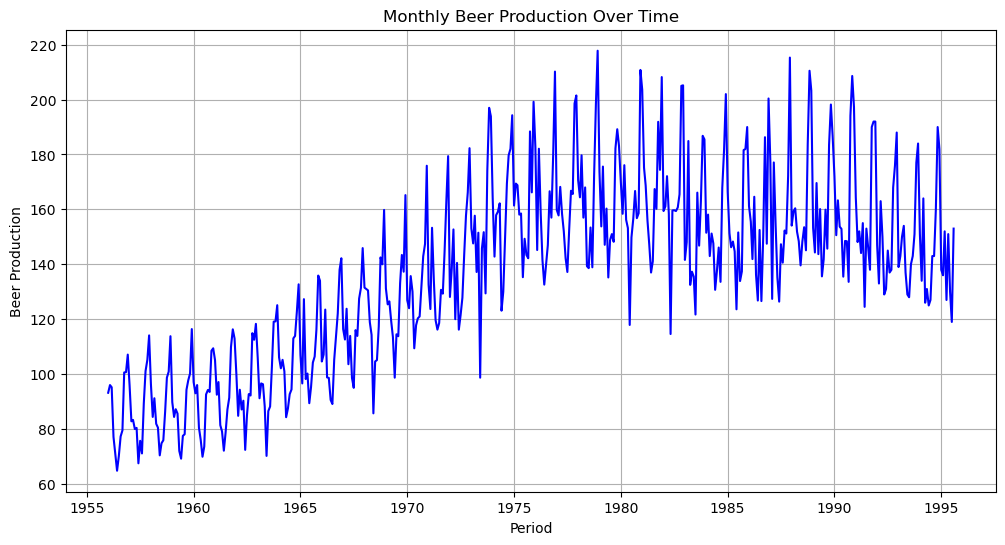

In [273]:
# Task 1.2 Time series plots to visualize trends and seasonality
BDS["Period"] = pd.to_datetime(BDS["Month"])
plt.figure(figsize=(12,6))
plt.plot(BDS["Period"], BDS["Monthly beer production"], color="blue")
plt.xlabel("Period")
plt.ylabel("Beer Production")
plt.title("Monthly Beer Production Over Time")
plt.grid(True)
plt.show()

In [274]:
# Now visualize separatetly by year to check any tends regarding every 12 months

In [275]:
BDS["Year"] = BDS["Period"].dt.year
BDS["Month"] = BDS["Period"].dt.month

In [276]:
BDS

,Month,Monthly beer production,Period,Year
0,1,93.2,1956-01-01,1956
1,2,96.0,1956-02-01,1956
2,3,95.2,1956-03-01,1956
3,4,77.1,1956-04-01,1956
4,5,70.9,1956-05-01,1956
...,...,...,...,...
471,4,127.0,1995-04-01,1995
472,5,151.0,1995-05-01,1995
473,6,130.0,1995-06-01,1995
474,7,119.0,1995-07-01,1995


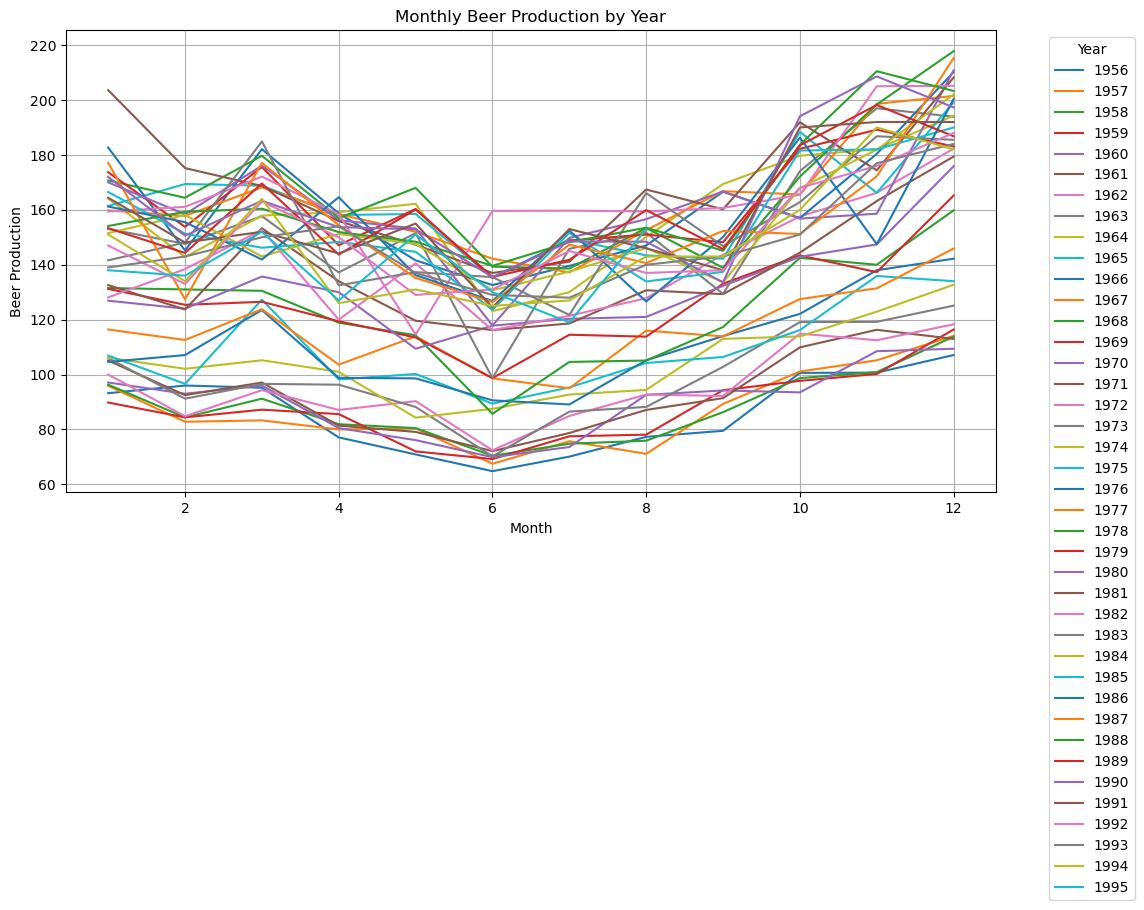

In [277]:
plt.figure(figsize=(12,6))

for year, group in BDS.groupby("Year"):
    plt.plot(group["Month"], group["Monthly beer production"], label=str(year))

plt.xlabel("Month")
plt.ylabel("Beer Production")
plt.title("Monthly Beer Production by Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [278]:
# Comments: It is possbile to identify some trends like it starts in medium level production and but decresing to the middle of the year, most of the
# line get the lowest production on month number 6, but after start increasing intul getting the highest level at the end of the year.

In [279]:
# Now visualize separatetly by decade to identify any tends regarding every 12 months
BDS["Decade"] = (BDS["Year"] // 10) * 10

In [280]:
BDS

,Month,Monthly beer production,Period,Year,Decade
0,1,93.2,1956-01-01,1956,1950
1,2,96.0,1956-02-01,1956,1950
2,3,95.2,1956-03-01,1956,1950
3,4,77.1,1956-04-01,1956,1950
4,5,70.9,1956-05-01,1956,1950
...,...,...,...,...,...
471,4,127.0,1995-04-01,1995,1990
472,5,151.0,1995-05-01,1995,1990
473,6,130.0,1995-06-01,1995,1990
474,7,119.0,1995-07-01,1995,1990


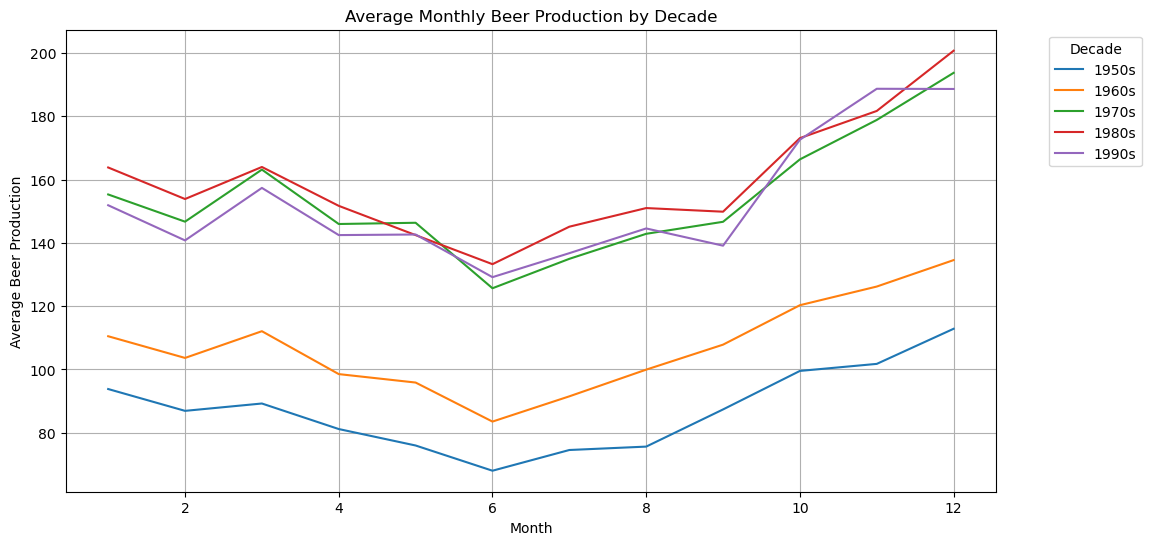

In [281]:
plt.figure(figsize=(12,6))

for decade, group in BDS.groupby("Decade"):
    # Promedio de producción por mes en esa década
    monthly_avg = group.groupby("Month")["Monthly beer production"].mean()
    
    plt.plot(monthly_avg.index, monthly_avg.values, label=f"{decade}s")

plt.xlabel("Month")
plt.ylabel("Average Beer Production")
plt.title("Average Monthly Beer Production by Decade")
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [282]:
# Comments: as you can see now the trends are very easy to identify, the last mentioned trend regarding the year of start, middle and end still there,
# and we can also identify that the last 3 decades (1970,80's and 90's) had a similiar behavior in production level between them, now campare to the
# first and second decades (1950 and 60's), we can conclude that the production level of the firt two decades are around half of the production level of
# the last 3 decades.

In [283]:
BDS_1 = BDS[["Period", "Monthly beer production"]].copy()
# task 1.3
# Convert Period to numeric if it is a date, checking options.
BDS_1["Period"] = pd.to_datetime(BDS_1["Period"])
BDS_1["Period"] = BDS_1["Period"].dt.year + BDS_1["Period"].dt.month/12.0

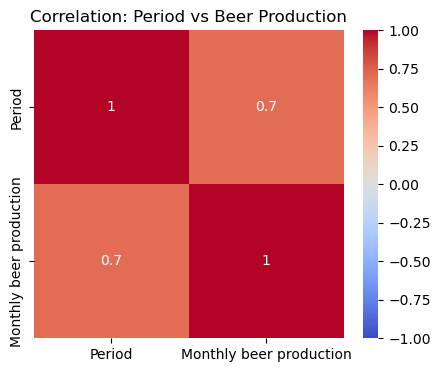

In [284]:
corr = BDS_1.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation: Period vs Beer Production")
plt.show()

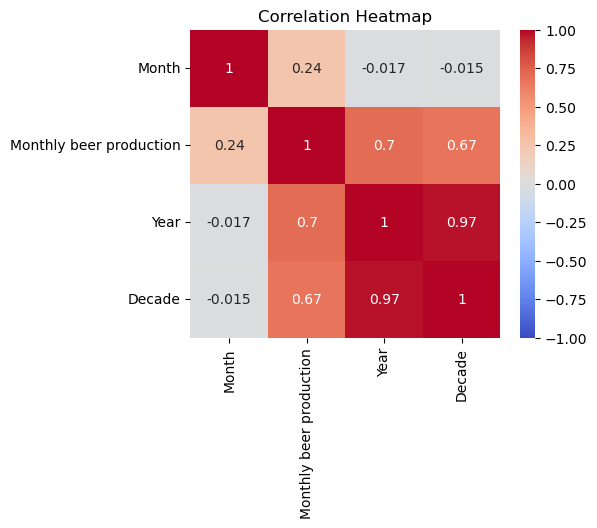

In [285]:
corr = BDS.corr(numeric_only=True)   # calcula matriz de correlación
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [286]:
# Task 1.4
BDS_2 = BDS.set_index("Period")

In [287]:
decomposition = seasonal_decompose(BDS_2["Monthly beer production"], model="additive", period=60)

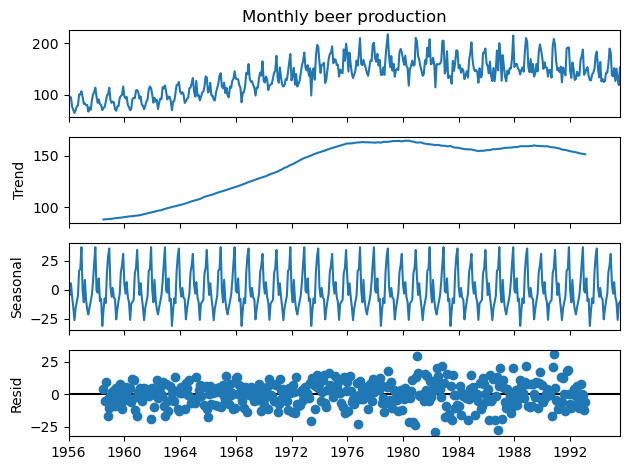

In [288]:
decomposition.plot()
plt.show()

In [289]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [290]:
# Task 2.1
print("Missing values before:", BDS.isnull().sum())

Missing values before: Month                      0
Monthly beer production    0
Period                     0
Year                       0
Decade                     0
dtype: int64


In [291]:
# Task 2.2
Q1 = BDS["Monthly beer production"].quantile(0.25)
Q3 = BDS["Monthly beer production"].quantile(0.75)
IQR = Q3 - Q1

In [292]:
Q3 , Q1

(158.825, 112.9)

In [293]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

44.01250000000003

In [294]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

227.71249999999998

In [295]:
OUT_IQR = BDS[(BDS["Monthly beer production"] < (Q1 - 1.5 * IQR)) |
                         (BDS["Monthly beer production"] > (Q3 + 1.5 * IQR))]

In [296]:
print("Outliers detected by IQR:", len(OUT_IQR))

Outliers detected by IQR: 0


In [297]:
import numpy as np
Z_SCORES = np.abs(stats.zscore(BDS["Monthly beer production"]))
OUT_Z = BDS[Z_SCORES > 3]

In [298]:
print("Outliers detected by Z-score:", len(OUT_Z))

Outliers detected by Z-score: 0


In [299]:
#the IQR and Z SCORE method to detect no outliers. That means your data points are all within “expected” statistical limits and range of the dataset..
#Stable data: If the dataset is well-behaved (no extreme spikes or drops).
#Small variance: If values are close together (narrow range).
#Strong seasonality but within consistent bounds: Seasonal patterns that don’t exceed the threshold won’t be flagged.

In [300]:
#Task 2.3

In [301]:
BDS["Day Of Week"] = BDS["Period"].dt.day_name()

In [302]:
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

In [303]:
BDS["Season"] = BDS["Month"].apply(assign_season)
BDS["Lag_last_month"] = BDS["Monthly beer production"].shift(1)
BDS["Lag_last_2Months"] = BDS["Monthly beer production"].shift(2)
BDS["Lag_last_year"] = BDS["Monthly beer production"].shift(12)

In [304]:
#Task 2.4 
corr = BDS.corr(numeric_only=True)

corr

,Month,Monthly beer production,Year,Decade,Lag_last_month,Lag_last_2Months,Lag_last_year
Month,1.000000,0.243430,-0.016752,-0.015407,-0.054042,-0.249804,0.237884
Monthly beer production,0.243430,1.000000,0.696150,0.671711,0.830355,0.738553,0.931648
Year,-0.016752,0.696150,1.000000,0.971735,0.704107,0.713245,0.712077
Decade,-0.015407,0.671711,0.971735,1.000000,0.677803,0.685953,0.683390
Lag_last_month,-0.054042,0.830355,0.704107,0.677803,1.000000,0.831331,0.851138
Lag_last_2Months,-0.249804,0.738553,0.713245,0.685953,0.831331,1.000000,0.732927
Lag_last_year,0.237884,0.931648,0.712077,0.683390,0.851138,0.732927,1.000000


In [305]:
# Task 2.5
Features = ["Monthly beer production", "Lag_last_month","Lag_last_2Months"]

In [306]:
scaler = StandardScaler()
BDS_scaled = BDS.copy()
BDS_scaled[Features] = scaler.fit_transform(BDS[Features])

In [307]:
BDS_scaled

,Month,Monthly beer production,Period,Year,Decade,Day Of Week,Season,Lag_last_month,Lag_last_2Months,Lag_last_year
0,1,-1.281638,1956-01-01,1956,1950,Sunday,Winter,NaN,NaN,NaN
1,2,-1.198560,1956-02-01,1956,1950,Wednesday,Winter,-1.279582,NaN,NaN
2,3,-1.222296,1956-03-01,1956,1950,Thursday,Spring,-1.196570,-1.279676,NaN
3,4,-1.759336,1956-04-01,1956,1950,Sunday,Spring,-1.220287,-1.196729,NaN
4,5,-1.943295,1956-05-01,1956,1950,Tuesday,Spring,-1.756900,-1.220428,NaN
...,...,...,...,...,...,...,...,...,...,...
471,4,-0.278768,1995-04-01,1995,1990,Saturday,Spring,0.463668,-0.011762,126.0
472,5,0.433330,1995-05-01,1995,1990,Monday,Spring,-0.277509,0.462224,131.0
473,6,-0.189755,1995-06-01,1995,1990,Thursday,Summer,0.434021,-0.278380,125.0
474,7,-0.516133,1995-07-01,1995,1990,Saturday,Summer,-0.188568,0.432600,127.0


In [308]:
# Task 3.1
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [309]:
BDS["Lag_last_month"] = pd.to_numeric(BDS["Lag_last_month"], errors="coerce")
BDS["Lag_last_2Months"] = pd.to_numeric(BDS["Lag_last_2Months"], errors="coerce")
BDS["Lag_last_year"] = pd.to_numeric(BDS["Lag_last_year"], errors="coerce")

In [310]:
BDS.dropna(inplace=True)
print('Data Errors')
print(BDS.isnull().sum())

x=BDS[["Year","Month","Decade","Lag_last_month","Lag_last_2Months","Lag_last_year"]]
y=BDS[["Monthly beer production"]]
x = x.dropna()
y = y.loc[x.index]

Data Errors
Month                      0
Monthly beer production    0
Period                     0
Year                       0
Decade                     0
Day Of Week                0
Season                     0
Lag_last_month             0
Lag_last_2Months           0
Lag_last_year              0
dtype: int64


In [311]:
# Task 3.2
Total_data = len(BDS)
training = int(0.70 * Total_data)
val = training + int(0.15 * Total_data)

In [312]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, shuffle=False)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.5, shuffle=False)

In [313]:
print(f"""Data split into:
Training size: {len(x_train)} Samples
Validation size: {len(x_val)} Samples
Test size: {len(x_test)} Samples""")

Data split into:
Training size: 324 Samples
Validation size: 70 Samples
Test size: 70 Samples


In [314]:
# Task 3.3
models= {"Linear Regression": LinearRegression(), "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)}
predictions = {}

In [315]:
for name , model in models.items():
    print (f"Training {name}")
    model.fit(x_train, y_train)
    predictions[name] = model.predict(x_val)

Training Linear Regression
Training Random Forest


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [316]:
def evaluate_model(name,y_true, y_pred, prefix=""):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Evaluation Metrics")
    print(f"Mean Squared Error (MSE): {mse:.2f}") 
    print(f"Mean Absolut Error (MAE): {mae:.2f}") 
    print(f"R Squared (R^2): {r2:.2f}")
    return mse, mae, r2

for name , model in models.items():
    print (f"Training {name}")
    model.fit(x_train, y_train)
    preds = model.predict(x_val)
    evaluate_model(name,y_val,preds)

Training Linear Regression

Linear Regression Evaluation Metrics
Mean Squared Error (MSE): 200.02
Mean Absolut Error (MAE): 11.24
R Squared (R^2): 0.54
Training Random Forest

Random Forest Evaluation Metrics
Mean Squared Error (MSE): 209.72
Mean Absolut Error (MAE): 11.76
R Squared (R^2): 0.52


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [317]:
#task 3.4
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
lr_pipe.fit(x_train, y_train)
y_val_pred_lr = lr_pipe.predict(x_val)

In [318]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

tscv = TimeSeriesSplit(n_splits=3)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)
grid.fit(x_train, y_train)

best_rf = grid.best_estimator_
y_val_pred_rf = best_rf.predict(x_val)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [319]:
def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    print(f"\n{name} Metrics")
    print(f"Mean Squared Error (MSE): {mse:.2f}") 
    print(f"Mean Absolut Error (MAE): {mae:.2f}") 
    print(f"R Squared (R^2): {r2:.2f}")
    return mse, mae, r2


print("Validation Results:")
evaluate("Linear Regression", y_val, y_val_pred_lr)
evaluate("Random Forest", y_val, y_val_pred_rf)

Validation Results:

Linear Regression Metrics
Mean Squared Error (MSE): 200.02
Mean Absolut Error (MAE): 11.24
R Squared (R^2): 0.54

Random Forest Metrics
Mean Squared Error (MSE): 209.01
Mean Absolut Error (MAE): 11.68
R Squared (R^2): 0.52


(209.01430476825544, 11.682047619047681, 0.5234768048146516)

In [320]:
# Task 3.5
importances = pd.Series(best_rf.feature_importances_, index=x.columns)
print("\nFeature Importances (Random Forest):")
print(importances.sort_values(ascending=False))


Feature Importances (Random Forest):
Lag_last_year       0.910656
Month               0.031338
Lag_last_month      0.019431
Lag_last_2Months    0.018486
Year                0.018408
Decade              0.001681
dtype: float64


In [321]:
# Task 3.6
y_test_pred_lr = lr_pipe.predict(x_test)
y_test_pred_rf = best_rf.predict(x_test)

print("\nTest Results:")
evaluate("Linear Regression", y_test, y_test_pred_lr)
evaluate("Random Forest", y_test, y_test_pred_rf)


Test Results:

Linear Regression Metrics
Mean Squared Error (MSE): 139.24
Mean Absolut Error (MAE): 9.68
R Squared (R^2): 0.71

Random Forest Metrics
Mean Squared Error (MSE): 118.23
Mean Absolut Error (MAE): 8.84
R Squared (R^2): 0.75


(118.22763860317527, 8.844704761904762, 0.7496762387746811)

In [340]:
period_test = BDS.loc[x_test.index, "Period"]

In [342]:
y_test_true = y.loc[x_test.index].values.ravel()
y_test_pred_lr = y_test_pred_lr.ravel()
y_test_pred_rf = y_test_pred_rf.ravel()

In [343]:
print(len(period_test), len(y_test_true), len(y_test_pred_lr))

70 70 70


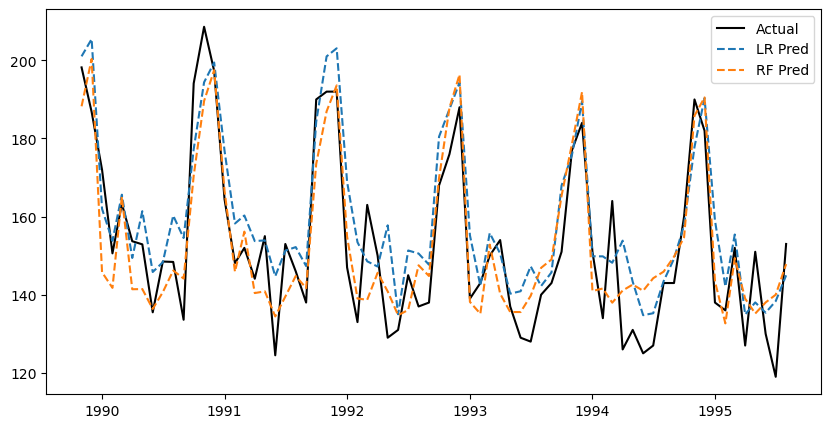

In [344]:
plt.figure(figsize=(10,5))
plt.plot(period_test, y_test_true, label="Actual", color="black")
plt.plot(period_test, y_test_pred_lr, label="LR Pred", linestyle="--")
plt.plot(period_test, y_test_pred_rf, label="RF Pred", linestyle="--")
plt.legend()